# Technical challenge
## Summary

This notebook contains all the steps I took for completing the part 2 of the technical challenge. The code written here is the source for the report created.

## Code
To get a look at the structure of the data, a sample loaded into a data frame:

In [1]:
import matplotlib
import pandas as pd

df = pd.read_csv('data/sample.csv')
df.head()

,producto,presentacion,marca,categoria,catalogo,precio,fechaRegistro,cadenaComercial,giro,nombreComercial,direccion,estado,municipio,latitud,longitud
0,CUADERNO FORMA ITALIANA,96 HOJAS PASTA DURA. CUADRICULA CHICA,ESTRELLA,MATERIAL ESCOLAR,UTILES ESCOLARES,25.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
1,CRAYONES,CAJA 12 CERAS. JUMBO. C.B. 201423,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,27.5,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
2,CRAYONES,CAJA 12 CERAS. TAMANO REGULAR C.B. 201034,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,13.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
3,COLORES DE MADERA,CAJA 12 PIEZAS LARGO. TRIANGULAR. C.B. 640646,PINCELIN,MATERIAL ESCOLAR,UTILES ESCOLARES,46.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
4,COLOR LARGO,CAJA 36 PIEZAS. CON SACAPUNTAS. 68-4036,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,115.0,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417


We can easily count how many columns thera are in the sample and so for in the data by doing:

In [2]:
len(df.columns)

15

For efficiency purposes, it is better if only the columns that are going to be used are stored in the data frame created, a test can be done with the sample data to give an idea of how much smaller the data frame is compared to when all the columns are included.

In [3]:
df.info(verbose = False, memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Columns: 15 entries, producto to longitud
dtypes: float64(3), object(12)
memory usage: 1.9 MB


This time, only one column will be loaded in the data frame:

In [4]:
df = pd.read_csv('data/sample.csv', usecols = ['cadenaComercial'])
df.info(verbose = False, memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Columns: 1 entries, cadenaComercial to cadenaComercial
dtypes: object(1)
memory usage: 142.6 KB


It can be seen that there is a significant reduction, of around *93%*, in the *memory usage*, from **1.9 MB** down to **142.6 KB**, this will have a huge impact for creating data frames to analize data in this project, mainly due to the volume of the data, over **20 GB**.

## How many commercial chains are monitored, and therefore, included in this database?
In order to answer, it is necessary to count how manny distinct values there are in column **cadenaComercial**, for this it will be enough to import only that column into the data frame:

In [5]:
df = pd.read_csv('data/all-data.csv', usecols = ['cadenaComercial'])

The memory usage can be calculated by:

In [6]:
df.info(verbose = False, memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62530715 entries, 0 to 62530714
Columns: 1 entries, cadenaComercial to cadenaComercial
dtypes: object(1)
memory usage: 4.1 GB


For the counting, pandas includes a method which will count the distinct values on an specified column:

In [7]:
df['cadenaComercial'].nunique()

705

After counting, the result is **705**, hence **there are 705 commercial chains monitored in the database**.

## Which is the commercial chain with the highest number of monitored products?

To further reduce memory usage, categorical data type can be used, that way the data frame will use even less memory. Again, *memory usage* is calculated to see how much less memory is used for the data frame:

In [8]:
df = pd.read_csv('data/all-data.csv', dtype = {'cadenaComercial': 'category'}, usecols = ['cadenaComercial'])

df.info(verbose = False, memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62530715 entries, 0 to 62530714
Columns: 1 entries, cadenaComercial to cadenaComercial
dtypes: category(1)
memory usage: 119.3 MB


For this question each row in the data set will be considered a *monitored product*, this is because even if two rows have the same value in the column **producto** they might have a different price or vendor, therefore they are monitored separately.

Having that in mind, counting the occurrences of each commercial chain and taking the top one will answer the question.

In [9]:
df.value_counts().head()

cadenaComercial        
WAL-MART                   8643133
BODEGA AURRERA             6765453
SORIANA                    6546211
MEGA COMERCIAL MEXICANA    4899509
CHEDRAUI                   4221625
dtype: int64

From the output, **WAL-MART** has the highest number of monitored products with a total of **8643133**, followed by *BODEGA AURRERA* with *6765453* records.

## What are the top 10 monitored products by State?

This time two columns are needed in order to answer the question, these being **producto** and **estado**, the column **estado** is supposed to have at most **32** different values, so it is the perfect candidate to use the categorical data type:

In [10]:
df = pd.read_csv('data/all-data.csv', dtype = {'estado': 'category'}, usecols = ['producto','estado'])

While exploring the newly created data frame, there are actually more than 32 different values, so by showing these values it is noticeable what the extra values are, apparently there are rows that instead of having the name of a state they simply have the string *'estado'* and a NaN "value".

In [11]:
set(df['estado'])

{'AGUASCALIENTES',
 'BAJA CALIFORNIA',
 'BAJA CALIFORNIA SUR',
 'CAMPECHE',
 'CHIAPAS',
 'CHIHUAHUA',
 'COAHUILA DE ZARAGOZA',
 'COLIMA',
 'DISTRITO FEDERAL',
 'DURANGO',
 'GUANAJUATO',
 'GUERRERO',
 'HIDALGO',
 'JALISCO',
 'MICHOACÁN DE OCAMPO',
 'MORELOS',
 'MÉXICO',
 'NAYARIT',
 'NUEVO LEÓN',
 'OAXACA',
 'PUEBLA',
 'QUERÉTARO',
 'QUINTANA ROO',
 'SAN LUIS POTOSÍ',
 'SINALOA',
 'SONORA',
 'TABASCO',
 'TAMAULIPAS',
 'TLAXCALA',
 'VERACRUZ DE IGNACIO DE LA LLAVE',
 'YUCATÁN',
 'ZACATECAS',
 'estado',
 nan}

The index of the rows with the *'estado'* value can be found with the following code, (a 1 is added so it can match the indices when the data frame is defined again).

In [12]:
bad_indx = [x + 1 for x in list(df[df['estado'] == 'estado'].index)]

The data frame is defined again but this time it won't have the rows with corrupted data.

In [13]:
df = pd.read_csv('data/all-data.csv', dtype = {'estado': 'category'}, usecols = ['producto','estado'], skiprows = bad_indx)

This is the *clean* data frame that will be used to find the answer, to start, pandas includes the method **groupby()** that can be combined with **value_counts()** to first group by a column and then get the count of unique values of anoter, this will return a Series object with the counts of products by state.

In [14]:
series = df.groupby('estado')['producto'].value_counts()
series

estado          producto               
AGUASCALIENTES  FUD                        12005
                DETERGENTE P/ROPA          10188
                LECHE ULTRAPASTEURIZADA     9824
                SHAMPOO                     9654
                REFRESCO                    9481
                                           ...  
TAMAULIPAS      MONTABLES                      5
                CASTAÑAS                       4
                DATIL                          3
                FRUTAS CUBIERTAS               3
                PAMPANILLO                     1
Name: producto, Length: 30360, dtype: int64

Finally, this object can be grouped by the column **estado** and with the use of the method **head()** the top ten products can be fetched.

In [15]:
ans = series.groupby('estado').head(10)
ans

estado          producto               
AGUASCALIENTES  FUD                        12005
                DETERGENTE P/ROPA          10188
                LECHE ULTRAPASTEURIZADA     9824
                SHAMPOO                     9654
                REFRESCO                    9481
                                           ...  
TAMAULIPAS      CHILES EN LATA             16008
                DESODORANTE                15994
                CEREALES                   15398
                PANTALLAS                  15180
                MAYONESA                   15014
Name: producto, Length: 320, dtype: int64

To have a better view of the answer the output is saved as a csv file called *topten.csv*

In [16]:
ans.to_csv('topten.csv')

## Interesting fact

One of the things that is of general interest is the price of fruits and legumes, with this premise, a question araise, which state has the lowest price on average for this kind of products?, to answer this, three columns of the data set will be used, **catalogo**, **precio** and **estado**

In [17]:
df = pd.read_csv('data/all-data.csv', dtype = {'estado': 'category', 'catalogo':'category'}, usecols = ['catalogo', 'precio', 'estado'], skiprows = bad_indx)

A new data frame called **fruits** will be defined, it will only contain the rows that have *FRUTAS Y LEGUMBRES* as value on the column **catalogo**

In [18]:
fruits = df[df['catalogo']== 'FRUTAS Y LEGUMBRES'].dropna()

This new data frame is first grouped by state, the average price for all products is calculated and at the end the result is sorted.

In [19]:
prices = fruits.groupby('estado').mean().sort_values('precio')
prices.head(5)

,precio
estado,
MICHOACÁN DE OCAMPO,19.504049
TLAXCALA,19.867144
HIDALGO,20.283334
MÉXICO,21.068735
OAXACA,21.313826


Using this data, a plot can be made to see more easily the states that have the lower and higher prices

<AxesSubplot:xlabel='estado'>

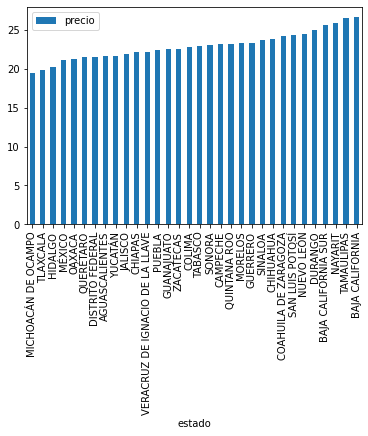

In [21]:
prices.sort_values('precio').plot.bar()

The interesting fact found is that, according to the data, the states with the highest average price are mainly the ones in the north of the country, my hypothesis is that this kinds of products are produced and harvested on the center and south part of the country, this will imply that they need to be shipped to the north states carrying an extra fee because of that.